### Assumptions
* Inserted the timestamps from `shelter.csv` into `powerdata.csv` and `OAT.csv` to make sure they would join

In [1]:
import pandas as pd
import pytz
from pandas.tseries.holiday import USFederalHolidayCalendar as calendar
import time
import datetime

In [2]:
pd.__version__

u'0.23.4'

In [3]:
import enum

In [4]:
pd.__file__

'/Users/jleyden/XBOS/mortar/env/lib/python2.7/site-packages/pandas/__init__.pyc'

### Making the Site Map DataFrame
I couldn't find a Site Map data source, so I am making a DF with a single entry for the Animal Shelter right now

In [12]:
sites = {
    'Green_Button_Meter': {
        'avenal-animal-shelter': 'f9ba6d7e-d730-31d7-95fb-d7ec0e4ab765',
        'ciee': 'd3489cfa-93a5-37e7-a274-0f35cf17b782'
    }
}
site_map = pd.DataFrame(sites)
site_map

,Green_Button_Meter
avenal-animal-shelter,f9ba6d7e-d730-31d7-95fb-d7ec0e4ab765
ciee,d3489cfa-93a5-37e7-a274-0f35cf17b782


### Reading the power file

In [23]:
# Some functions for sampling from the csv

def _utc_to_local(data, local_zone="America/Los_Angeles"):

    try:
         data.index = data.index.tz_localize(local_zone)
    except(TypeError):
         data.index = data.index.tz_convert(local_zone) 
     # accounts for localtime shift
    # Gets rid of extra offset information so can compare with csv data
    # to account for dst
    data.index = data.index.tz_localize(None)
    return data
    
def _resample_at_Nmin(data,Nmin="15min",): 
    data = data.resample(Nmin).mean() # NOTE: had to change to how='mean'
    return data

def _get_recent_data_from_csv(filename, Nmin="15min", local_zone="America/Los_Angeles"):
    data = pd.read_csv(filename, index_col=0)
    data.index = pd.to_datetime(data.index)
    data.index.name = "datetime"
    data = _utc_to_local(data)
    data = _resample_at_Nmin(data,Nmin)
    return data

def process_df(df, Nmin="15min", local_zone="America/Los_Angeles"):
    data = df
    data.index = pd.to_datetime(data.index)
    data.index.name = "datetime"
    data = _utc_to_local(data)
    data = _resample_at_Nmin(data,Nmin)
    return data

In [24]:
from collect import get_weather_power_tstat

site = "ciee"
start = '2018-07-01T00:00:00Z'
end = '2018-07-08T00:00:00Z'

weather_data, power, tstat = get_weather_power_tstat(site, start, end)


In [81]:
# power_gb = _get_recent_data_from_csv('./data/power.csv') * 4 # NOTE: why multiplying by 4 ? Energy <-> Power

### MDAL QUERY

power_gb = process_df(power.df) * 4

# power_last_day=_get_recent_data_from_csv('all_power_eagle.csv',Nmin="15min") # use if gbmeters is not recent enough
# power_last_day.columns=power_gb.columns
# power_eagle=eagle_adjust(power_last_day)
# power_15min=pd.concat([power_gb, power_eagle], axis=0) # NOTE: No power_eagle
power_15min = power_gb
event_day = pd.Timestamp('2018-07-01T00:00:00')
# weather=_get_recent_data_from_csv('OAT_all_pdp_baseline.csv',Nmin="1h") # NOTE: No Weather Data
power_15min=power_15min[power_15min.index < event_day + pd.Timedelta(days=1)]
power_15min

,d3489cfa-93a5-37e7-a274-0f35cf17b782
datetime,
2018-06-30 17:00:00,2240.0
2018-06-30 17:15:00,2080.0
2018-06-30 17:30:00,2240.0
2018-06-30 17:45:00,2080.0
2018-06-30 18:00:00,2080.0
2018-06-30 18:15:00,2720.0
2018-06-30 18:30:00,3040.0
2018-06-30 18:45:00,3200.0
2018-06-30 19:00:00,3200.0


### Reading the tstat file and joining with power data

In [31]:
tstat.context

{u'03099008-5224-3b61-b07e-eee445e64620': {u'?t': u'http://xbos.io/ontologies/ciee#HVAC_Zone_Southzone_tstat_temperature',
  u'?t_uuid': u'03099008-5224-3b61-b07e-eee445e64620',
  u'?tstat': u'http://xbos.io/ontologies/ciee#HVAC_Zone_Southzone_tstat'},
 u'b47ba370-bceb-39cf-9552-d1225d910039': {u'?t': u'http://xbos.io/ontologies/ciee#HVAC_Zone_Eastzone_tstat_temperature',
  u'?t_uuid': u'b47ba370-bceb-39cf-9552-d1225d910039',
  u'?tstat': u'http://xbos.io/ontologies/ciee#HVAC_Zone_Eastzone_tstat'},
 u'c05385e5-a947-37a3-902e-f6ea45a43fe8': {u'?t': u'http://xbos.io/ontologies/ciee#HVAC_Zone_Centralzone_tstat_temperature',
  u'?t_uuid': u'c05385e5-a947-37a3-902e-f6ea45a43fe8',
  u'?tstat': u'http://xbos.io/ontologies/ciee#HVAC_Zone_Centralzone_tstat'},
 u'c7e33fa6-f683-36e9-b97a-7f096e4b57d4': {u'?t': u'http://xbos.io/ontologies/ciee#HVAC_Zone_Northzone_tstat_temperature',
  u'?t_uuid': u'c7e33fa6-f683-36e9-b97a-7f096e4b57d4',
  u'?tstat': u'http://xbos.io/ontologies/ciee#HVAC_Zone_North

In [26]:
process_df(tstat.df)

,c05385e5-a947-37a3-902e-f6ea45a43fe8,03099008-5224-3b61-b07e-eee445e64620,c7e33fa6-f683-36e9-b97a-7f096e4b57d4,b47ba370-bceb-39cf-9552-d1225d910039
datetime,,,,
2018-06-30 17:00:00,77.000000,75.000000,77.000000,73.698160
2018-06-30 17:15:00,77.000000,75.000000,77.000000,73.801235
2018-06-30 17:30:00,77.121495,75.000000,77.000000,73.920276
2018-06-30 17:45:00,77.837500,75.000000,77.000000,73.918293
2018-06-30 18:00:00,78.000000,74.790123,77.000000,74.000000
2018-06-30 18:15:00,78.000000,75.000000,77.000000,73.955349
2018-06-30 18:30:00,78.000000,75.000000,77.283951,74.045399
2018-06-30 18:45:00,78.000000,75.000000,78.000000,74.113580
2018-06-30 19:00:00,78.000000,75.419753,77.875000,73.808589


In [37]:
def _configure_df(site, tstat_filename):
    meter=site_map.loc[site, 'Green_Button_Meter']
    power=power_15min[meter]
    df_tstat=_get_recent_data_from_csv(tstat_filename)
    df = df_tstat.join(power)[['heat_setpoint_z0', 'cool_setpoint_z0', 'IAT_z0', meter]]
    df.columns=['Heating', 'Cooling', 'IAT', 'demand']
    return df, site

def _configure_MDAL_df(site, tstat_data):
    meter=site_map.loc[site, 'Green_Button_Meter']
    power=power_15min[meter]
    df_tstat=process_df(tstat_data)
    df_tstat.columns = ['heat_setpoint_z0', 'cool_setpoint_z0','', 'IAT_z0'] #TODO: Actually fix this
    df = df_tstat.join(power)[['heat_setpoint_z0', 'cool_setpoint_z0', 'IAT_z0', meter]]
    df.columns=['Heating', 'Cooling', 'IAT', 'demand']
    return df, site

# animal_shelter, site_1 = _configure_df('avenal-animal-shelter', './data/shelter_tstat.csv')
ieee, site_2 = _configure_MDAL_df(site, tstat.df)

In [38]:
# Putting the sites in an array for plotting
site_dfs = [(ieee, site_2)]

### Getting Weather Data

In [39]:
weather=process_df(weather_data.df, Nmin="1h") # NOTE: Taking every hour for Weather data instead of 15 mins
weather.head()

,a73c1b67-142f-3b45-baf8-e308619b6bbc,00327584-54b2-35a8-aaed-182747a5dda7
datetime,,
2018-06-30 17:00:00,64.04,55.2596
2018-06-30 18:00:00,NaN,NaN
2018-06-30 19:00:00,NaN,NaN
2018-06-30 20:00:00,NaN,NaN
2018-06-30 21:00:00,NaN,NaN


### Plotting: utility functions 

In [70]:
def _select_demand(data): #and Temp

    # get only demand
    demand = data.filter(regex="demand").resample("15min").mean()
    temperature=data.filter(regex="IAT").resample("15min").mean()  ## change to "1h" for 1 hour pivots
    heating=data.filter(regex="Heating").resample("15min").mean()  # NOTE: Means again ?
    cooling=data.filter(regex="Cooling").resample("15min").mean()
    
    return demand, temperature, heating, cooling 

def _create_pivot(data, freq="15min"):
    
    if freq=="15min":
        data["date"] = data.index.date
        data["combined"]=data.index.hour+(data.index.minute*(1.0/60.0))
        #data_pivot=data.groupby(data["combined"])#.mean()[data.columns[0]]
        data_pivot = data.set_index(["date","combined"]).unstack()
        # remove double index
        data_pivot.columns = data_pivot.columns.droplevel(0)
        
    elif freq=="1h":
        # add date and hour for new index                          
        data["date"] = data.index.date
        data["hour"] = data.index.hour

        # create pivot
        data_pivot = data.set_index(["date","hour"]).unstack()
        # remove double index
        data_pivot.columns = data_pivot.columns.droplevel(0)

    return data_pivot

def _remove_event_day(data, event_day):
    
    try:
        data = data[~(data.index.date == event_day.date())]
        return data
    except:
        return data

def _remove_WE_holidays_NaN(data):
    
    cal = calendar()
    start = datetime.datetime.strftime(data.index.min(),"%Y-%m-%d")
    end =datetime.datetime.strftime(data.index.max(),"%Y-%m-%d")
    hol_cal = cal.holidays(start=start, end=end)
    
    data = data.dropna(how='any') # remove if has any NaN for any hour
    
    no_hol = ~data.index.isin(hol_cal) # remove if it is a national holiday
    no_WE = ~((data.index.weekday == 5) | (data.index.weekday == 6)) # remove if WE
    
    return data[no_WE & no_hol]

def _get_last_Y_days(data, Y=10):
    
    try:
        data = data.sort_index(ascending=False).iloc[0:Y,:]
        return data
    except:
        print("data available only for {} days".format(data.shape[0]))
        return data
    
def _get_X_in_Y(data, X=None, event_start_h=14, event_end_h=18, include_last=False):
    
    if not X:
        X=data.shape[0]
    
    cols = range(event_start_h, event_end_h+include_last*1)
    x_days = data.iloc[:, cols].sum(axis=1).sort_values(ascending=False)[0:X].index
    
    #print ('get x in y', data[data.index.isin(x_days)] )
    return data[data.index.isin(x_days)], x_days

def _get_adj_ratio(data, 
                    event_data,
                    event_start_h=12,
                    min_ratio=1.0, 
                    max_ratio=1.2,):
    
    # this is hardcoded, we may want to do it in a more flexible way
    # strategy: 4 hours before the event, take the first 3 and average them
    pre_event_period_start = event_start_h - 4
    cols = range(pre_event_period_start, event_start_h - 1) 
    
    try:
        ratio = event_data[cols].mean().mean()/data[cols].mean().mean()
    except:
        ratio=1
    
    return ratio


def get_X_in_Y_baseline(data,
                        X=3, 
                        Y=10, 
                        event_start_h=12,
                        event_end_h=18,
                        include_last=False,
                        adj_ratio=True,
                        min_ratio=1.0, 
                        max_ratio=1.2,
                        sampling="quarterly"):
    event_data= data[data.index.date == event_day.date()]
    
    data = _remove_event_day(data, event_day) #NOTE: Not sure why we are removing the event day
    data = _remove_WE_holidays_NaN(data)
    data = _get_last_Y_days(data, Y)

    days = data.index
    data, x_days = _get_X_in_Y(data, 
                       X=X, 
                       event_start_h=event_start_h, 
                       event_end_h=event_end_h, 
                       include_last=include_last)
    if adj_ratio:
    
        ratio = _get_adj_ratio(data, event_data, 
                               event_start_h=event_start_h,
                               min_ratio=min_ratio, 
                               max_ratio=max_ratio)
    else:
        ratio = 1
    ratio = 1 #TODO: ratio was causing NaNs
    data = (data.mean()*ratio).to_frame() # baseline is the average of the days selected
    data.columns = ["baseline"]
    return data, days, event_data.T, x_days


### Making the baseline

In [41]:
def make_baseline(x_days, pivot, name="Temperature", freq="15min"):
    baseline=pivot[pivot.index.isin(x_days)].mean(axis=0)
    baseline_df=baseline.to_frame(name)
    if freq=="15min":
        baseline_df=create_timeseries(baseline_df)
    return baseline_df

def create_timeseries(df):
    col=[]
    df.columns=['demand']
    for i in df.index:
        hours=int(i)//1
        minutes=(i%1)*60
        col.append(event_day+pd.Timedelta(hours=hours, minutes=minutes))
    df["Time"]=col

    adj_df=df.set_index(["Time"])
    df=adj_df[adj_df.columns[0]]
    return df

### Calculating Cost

In [42]:
# from bill_calculator_lib.cost_calculator.cost_calculator import CostCalculator
# from bill_calculator_lib.openei_tariff.openei_tariff_analyzer import *
# from bill_calculator_lib.cost_calculator.tariff_structure import *


In [43]:
import matplotlib.pyplot as plt
import matplotlib

In [44]:
# map_site_to_tariff = {
#     'f9ba6d7e-d730-31d7-95fb-d7ec0e4ab765':  # avenal-animal-shelter
#     OpenEI_tariff(utility_id='14328',
#                   sector='Commercial',
#                   tariff_rate_of_interest='A-1 Small General Service',  # need to add Small General Service to get the right data ..
#                   distrib_level_of_interest=None,
#                   phasewing='Single',
#                   tou=True),
#     'b31a38a5-659b-35e0-ad67-6ab8253da49a':  # north-berkeley-senior-center
#     OpenEI_tariff(utility_id='14328',
#                   sector='Commercial',
#                   tariff_rate_of_interest='A-10',
#                   distrib_level_of_interest='Secondary',
#                   phasewing=None,
#                   tou=True),
#     '83146bd5-7893-3497-a0b8-cfe1af8d9f0f':  # berkeley-corporate-yard
#     OpenEI_tariff(utility_id='14328',
#                   sector='Commercial',
#                   tariff_rate_of_interest='A-10',
#                   distrib_level_of_interest='Secondary',
#                   phasewing=None,
#                   tou=True),
#     'd3489cfa-93a5-37e7-a274-0f35cf17b782':  # ciee
#     OpenEI_tariff(utility_id='14328',
#                   sector='Commercial',
#                   tariff_rate_of_interest='A-1 Small General Service',  # need to add Small General Service to get the right data ..
#                   distrib_level_of_interest=None,
#                   phasewing='Single',
#                   tou=True)
# }

In [45]:
def calculate_bill(df, meter, start=None, end=None):
    bill_calc, df=instantiate(df, meter,start,end)
    bill = bill_calc.compute_bill(df)#, monthly_detailed=True)
    t, tt, ttt = bill_calc.print_aggregated_bill(bill, verbose=False)
    return (t,tt,ttt)

def instantiate(df, meter,start=None,end=None):
    df=df.dropna()
    df=df[ start: end]
    bill_calc = CostCalculator()
    tariff_openei_data = map_site_to_tariff[meter]  # This points to an object

    if tariff_openei_data.read_from_json() == 0:  # Reading revised JSON blocks containing the utility rates
        #print "Tariff read from JSON successful"
        x=2
    else:
        print("An error occurred when reading the JSON file")
        exit()

    tariff_struct_from_openei_data(tariff_openei_data, bill_calc)
    
    return bill_calc,df

def cost_calc(df, site, meter,start=None, end=None):
    # site=names.loc[meter, 'site']
    t,tt,ttt=calculate_bill(df, meter, start=start, end=end)
    total_cost=t

    
    fixed=tt[ChargeType.FIXED]
    energy_cost=ttt['customer_energy_charge'][1]
    
#     if ttt['pdp_non_event_energy_credit']=={}:
#         energy_pdprebate=0
#     else:
#         energy_pdprebate=ttt['pdp_non_event_energy_credit'][1]
    baseline_season, baseline_tou=demand_calc(days, meter, start=None, end=None)
    if ttt['customer_demand_charge_season']!={}:
        demand_season_max=[data['max-demand']  for p, data in ttt['customer_demand_charge_season'].items()][0]
    else:
        demand_season_max=0
    if ttt['customer_demand_charge_tou']!={}:
        demand_tou_max=[p * data['max-demand'] for p, data in ttt['customer_demand_charge_tou'].items()][0]
    else:
        demand_tou_max=0
        
    if demand_season_max>baseline_season:
        demand_charge_season=sum([p * (data['max-demand']-baseline_season)  for p, data in ttt['customer_demand_charge_season'].items()])
    else: demand_charge_season=0
        
    if demand_tou_max>baseline_tou:
        demand_charge_tou=sum([p * (data['max-demand']-baseline_tou) for p, data in ttt['customer_demand_charge_tou'].items()])
    else:
        demand_charge_tou=0
    #demand_pdprebate=sum([p*data['max-demand'] for p, data in ttt['pdp_non_event_demand_credit'].items()])
    #TODO figure out how to address demand_pdprebate
   
    demand_charge=demand_charge_season+ demand_charge_tou           #apply to other demand charges
    if ttt['pdp_event_energy_charge'][1]=={}:
        PDP_cost=0
    else:
        PDP_cost=ttt['pdp_event_energy_charge'][1]

    #cost_breakdown=pd.Series({'Energy Usage':energy_cost+energy_pdprebate, 'Demand Usage':demand_charge+demand_pdprebate, 'Fixed Cost': fixed, 'Peak Day Charges': PDP_cost})
    cost_breakdown=pd.Series({'Energy Usage':energy_cost, 'Demand Usage':demand_charge, 'Fixed Cost': fixed, 'Peak Day Charges': PDP_cost})
   
    return cost_breakdown, demand_charge_season, demand_charge_tou  

In [46]:
from pandas.tseries.holiday import USFederalHolidayCalendar as calendar
import datetime

In [71]:

df = site_dfs[0]
site=df[1]
weather_site = weather[site]
weather_site=weather_site.to_frame()
weather_site.columns=["OAT_Event"] #adjust collumn name to show up in legend properly

event_start_h=14
event_end_h=18
baseline_temp=[]
baseline_demand_3=[]
baseline_cooling=[]
baseline_heating=[]
baseline_weather=[]
X=3
index_list=[]


count=0

data = df[0]
demand, temperature, heating, cooling = _select_demand(data)
demand_pivot = _create_pivot(demand).dropna()
temperature_pivot = _create_pivot(temperature).dropna()
heating_pivot = _create_pivot(heating).dropna()
cooling_pivot = _create_pivot(cooling).dropna()
weather_pivot= _create_pivot(weather_site, freq='1h').dropna()
demand_baseline, days, event_data, x_days=get_X_in_Y_baseline(demand_pivot,
                    X=3,
                    Y=10, 
                    event_start_h=event_start_h,
                    event_end_h=event_end_h, 
                    adj_ratio=True,
                    min_ratio=1.0, 
                    max_ratio=1.2,
                    sampling="quarterly")

upper=max(int(demand_baseline.T.max(axis=1)),int(demand_pivot[demand_pivot.index==event_day].max(axis=1).values))
ax4=demand_baseline.T.append(demand_pivot[demand_pivot.index==event_day]).T.plot(title=site+' DR Event',ylim=(0,upper*1.1), marker='o',figsize=(18,5),xticks=range(24))

baseline_demand_3.append(demand_baseline.T)
index_list.append(site)

ax4.title.set_size(20)

plt.plot([event_start_h,event_start_h],[0,max(data['demand'])], color='r', linestyle = '-.')
p1 =plt.plot([event_end_h,event_end_h],[0,max(data['demand'])], color='r', linestyle = '-.')
count+=1

event_index=(str(event_day))[0:10]
weather_site=weather_site[event_index:event_index]
weather_event=weather_site
weather_event=weather_event.set_index("hour")
p3 =weather_event.plot(ax=ax4, xticks=range(24),secondary_y=True, figsize=(18,5), marker='o', color='g', label="OAT Event")

# #plot OAT_baseline
weather_baseline=make_baseline(x_days, weather_pivot, name="OAT_Baseline", freq="1h")
weather_baseline.plot(ax=ax4, xticks=range(24),secondary_y=True, figsize=(18,5), marker='o', color='c', label="OAT Baseline")


# #IAT Temperature baseline
temperature_baseline=make_baseline(x_days, temperature_pivot, name="IAT_Baseline")


meter=site_map.loc[site, 'Green_Button_Meter']
# #calculating cost of event
event_df=create_timeseries(event_data)
event_df.to_csv('./data/event_df.csv')
# cost_event, event_season, event_tou=cost_calc(event_df, site, meter)


baseline_df=create_timeseries(demand_baseline)
baseline_df.to_frame(name='demand')
# cost_baseline, baseline_season, baseline_tou=cost_calc(baseline_df, meter,start=None, end=None)

plt.figure()


# plot_metric_bars(site, data, demand_baseline, temperature_baseline, cost_event, cost_baseline)

demand_baseline.T.append(demand_pivot[demand_pivot.index==event_day]).to_csv('./data/demand.csv')

KeyError: 'ciee'

In [48]:
plt.close('all')

### Plotting for each site 

In [51]:
weather.head()

,a73c1b67-142f-3b45-baf8-e308619b6bbc,00327584-54b2-35a8-aaed-182747a5dda7
datetime,,
2018-06-30 17:00:00,64.04,55.2596
2018-06-30 18:00:00,NaN,NaN
2018-06-30 19:00:00,NaN,NaN
2018-06-30 20:00:00,NaN,NaN
2018-06-30 21:00:00,NaN,NaN


In [52]:
weather['mean'] = weather.mean(axis=1)
weather.head()

,a73c1b67-142f-3b45-baf8-e308619b6bbc,00327584-54b2-35a8-aaed-182747a5dda7,mean
datetime,,,
2018-06-30 17:00:00,64.04,55.2596,59.6498
2018-06-30 18:00:00,NaN,NaN,NaN
2018-06-30 19:00:00,NaN,NaN,NaN
2018-06-30 20:00:00,NaN,NaN,NaN
2018-06-30 21:00:00,NaN,NaN,NaN


baseline    4586.666667
dtype: float64
1
combined     0.00    0.25    0.50    0.75    1.00    1.25    1.50    1.75   \
date                                                                         
2018-07-01  2240.0  2080.0  2240.0  2240.0  2240.0  2240.0  2080.0  2240.0   

combined     2.00    2.25    ...     21.50   21.75   22.00   22.25   22.50  \
date                         ...                                             
2018-07-01  2080.0  2080.0   ...    1920.0  2080.0  1920.0  1920.0  2080.0   

combined     22.75   23.00   23.25   23.50   23.75  
date                                                
2018-07-01  1920.0  2720.0  2400.0  2080.0  1920.0  

[1 rows x 96 columns]


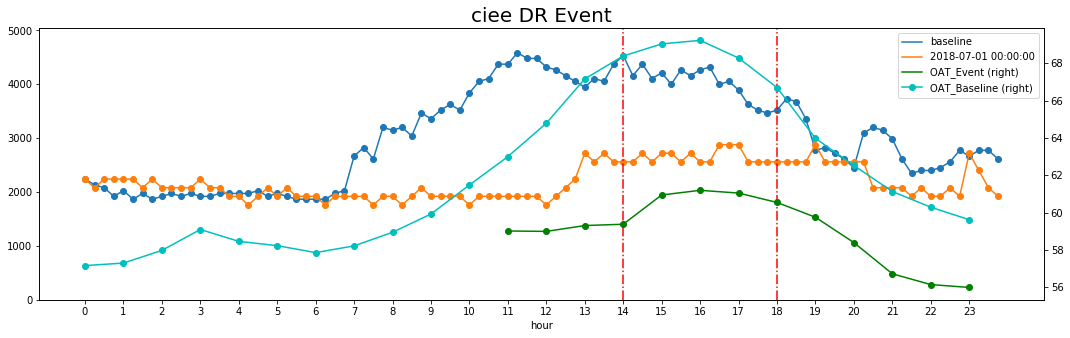

<Figure size 432x288 with 0 Axes>

In [83]:
event_start_h=14
event_end_h=18
baseline_temp=[]
baseline_demand_3=[]
baseline_cooling=[]
baseline_heating=[]
baseline_weather=[]
X=3
index_list=[]

def plot():
    for df in site_dfs:
        site=df[1]
        weather_site = weather['mean']
        weather_site=weather_site.to_frame()
        weather_site.columns=["OAT_Event"] #adjust collumn name to show up in legend properly

        count=0

        data = df[0]
        demand, temperature, heating, cooling = _select_demand(data)
        demand_pivot = _create_pivot(demand)
        temperature_pivot = _create_pivot(temperature)
        heating_pivot = _create_pivot(heating)
        cooling_pivot = _create_pivot(cooling)
        weather_pivot= _create_pivot(weather_site, freq='1h')
        demand_baseline, days, event_data, x_days=get_X_in_Y_baseline(demand_pivot,
                            X=X,
                            Y=10, 
                            event_start_h=event_start_h,
                            event_end_h=event_end_h, 
                            adj_ratio=True,
                            min_ratio=1.0, 
                            max_ratio=1.2,
                            sampling="quarterly")
        print(demand_baseline.T.max(axis=1))
        print(len(demand_baseline.T.max(axis=1)))
        print(demand_pivot[demand_pivot.index==event_day])
        upper=max(int(demand_baseline.T.max(axis=1)),int(demand_pivot[demand_pivot.index==event_day].max(axis=1).values))
        ax4=demand_baseline.T.append(demand_pivot[demand_pivot.index==event_day]).T.plot(title=site+' DR Event',ylim=(0,upper*1.1), marker='o',figsize=(18,5),xticks=range(24))

        baseline_demand_3.append(demand_baseline.T)
        index_list.append(site)
        #plt.legend(['Baseline', 'Event', 'Temperature'], loc='center left')
        ax4.title.set_size(20)


        #t,tt,ttt=calculate_bill(demand, demand.columns[0], start=str(days[9]), end=str(days[0])) # why is this not working?

        plt.plot([event_start_h,event_start_h],[0,max(data['demand'])], color='r', linestyle = '-.')
        p1 =plt.plot([event_end_h,event_end_h],[0,max(data['demand'])], color='r', linestyle = '-.')
        count+=1

        #plot inside temperature
    #     event_index=(str(event_day))[0:10]
    #     data_event =data[event_index:event_index]
    #     data_event=data_event.resample('1h').mean()
    #     data_event.index=data_event.index.hour
    #     p2 =data_event['IAT'].plot(xticks=range(24),secondary_y=True, figsize=(18,5), marker='o', color='k', label="IAT Event")
    #     plt.legend(['IAT Event'], loc='upper left')

        #plot OAT_event
        
        event_index=(str(event_day))[0:10]
        weather_site=weather_site[event_index:event_index]
        weather_event=weather_site
        weather_event=weather_event.set_index("hour")
        p3 =weather_event.plot(ax=ax4, xticks=range(24),secondary_y=True, figsize=(18,5), marker='o', color='g', label="OAT Event")
        #plt.legend(['OAT Temperature Event'], loc='lower left')

        #plot OAT_baseline
        weather_baseline=make_baseline(x_days, weather_pivot, name="OAT_Baseline", freq="1h")
        weather_baseline.plot(ax=ax4, xticks=range(24),secondary_y=True, figsize=(18,5), marker='o', color='c', label="OAT Baseline")


        #IAT Temperature baseline
        temperature_baseline=make_baseline(x_days, temperature_pivot, name="IAT_Baseline")
    #     temp_base=temperature_baseline.resample('1h').mean()
    #     temp_base.index=temp_base.index.hour
    #     #Uncomment below to plot baseline IAT
    #     #temp_base.plot(ax=ax4, xticks=range(24),secondary_y=True, figsize=(18,5), marker='o', color='b')


        meter=site_map.loc[site, 'Green_Button_Meter']
        #calculating cost of event
        event_df=create_timeseries(event_data)
        # cost_event, event_season, event_tou=cost_calc(event_df, meter,start=None, end=None)


        baseline_df=create_timeseries(demand_baseline)
        baseline_df.to_frame(name='demand')
        # cost_baseline, baseline_season, baseline_tou=cost_calc(baseline_df, meter,start=None, end=None)

        plt.figure()


        # plot_metric_bars(site, data, demand_baseline, temperature_baseline, cost_event, cost_baseline)
plot()

In [26]:
pd.__version__

u'0.23.4'

In [27]:
import pandas as pd
import matplotlib.pyplot as plt

In [28]:
demand_pivot[demand_pivot.index==event_day].max(axis=1).values

array([8712.53333333])

In [29]:
pd.Series([1, 2]).multiply([3, 4])

0    3
1    8
dtype: int64

In [30]:
from collect import get_weather_power_tstat

In [31]:
site = "ciee"
start = '2018-07-01T00:00:00Z'
end = '2018-07-08T00:00:00Z'

In [39]:
weather, power, tstat = get_weather_power_tstat(site, start, end)

In [45]:
process_df(power.df)

,d3489cfa-93a5-37e7-a274-0f35cf17b782
datetime,
2018-06-30 17:00:00,540.0
2018-06-30 17:15:00,NaN
2018-06-30 17:30:00,NaN
2018-06-30 17:45:00,NaN
2018-06-30 18:00:00,690.0
2018-06-30 18:15:00,NaN
2018-06-30 18:30:00,NaN
2018-06-30 18:45:00,NaN
2018-06-30 19:00:00,770.0


In [47]:
tstat.df

,c7e33fa6-f683-36e9-b97a-7f096e4b57d4,c05385e5-a947-37a3-902e-f6ea45a43fe8,b47ba370-bceb-39cf-9552-d1225d910039,03099008-5224-3b61-b07e-eee445e64620
2018-06-30 17:00:00-07:00,77.000000,77.230548,73.841218,75.000000
2018-06-30 18:00:00-07:00,77.295977,78.000000,74.023110,74.951149
2018-06-30 19:00:00-07:00,77.518732,77.729107,73.372766,75.184438
2018-06-30 20:00:00-07:00,77.000000,77.000000,72.732295,74.931034
2018-06-30 21:00:00-07:00,77.000000,77.000000,73.074184,74.672414
2018-06-30 22:00:00-07:00,76.985591,77.000000,73.703556,75.603448
2018-06-30 23:00:00-07:00,76.698667,77.000000,73.822296,75.229333
2018-07-01 00:00:00-07:00,76.000000,76.028736,73.984561,73.371758
2018-07-01 01:00:00-07:00,76.000000,76.000000,73.573191,73.000000
2018-07-01 02:00:00-07:00,75.850575,76.000000,73.192199,73.000000


In [4]:
from plot_event import plot_event

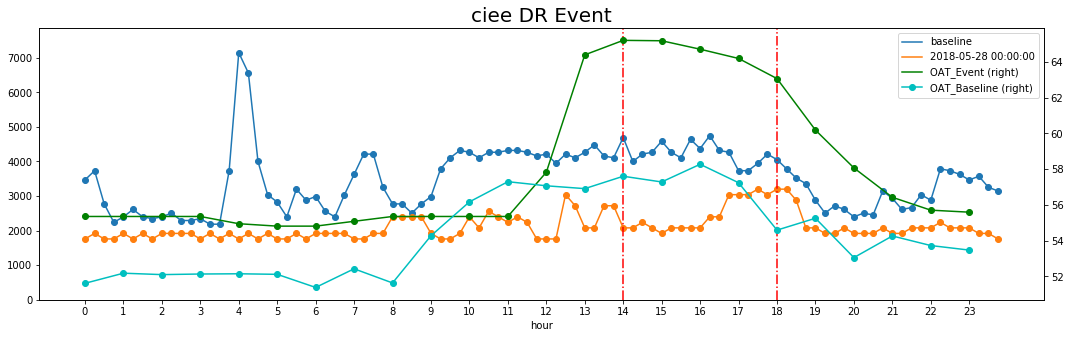

<Figure size 432x288 with 0 Axes>

In [5]:
# Issues: getting the right thermostat data -- hsp, csp, IAT not the columns
# some event days dont work

site = 'ciee'
start = '2018-05-01T00:00:00Z'
end = '2018-05-30T00:00:00Z'
event_day = '2018-05-28T00:00:00'


plot_event(site, event_day, start, end, 14, 18);